<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





In [1]:
# Import the DataGen class from the data_gen module and some utility functions 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity
from ts_data_generator.utils.functions import random_choice
import matplotlib.pyplot as plt

In [2]:
d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-02"
d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_metric(name="temperature", function_type="sine", frequency_in_hour=12, offset_in_minutes=0, scale=1)
d.add_metric(name="const", function_type="constant", function_value=0.5)
d.generate_data()

In [3]:
d.data

,product,temperature,const,datetime
0,A,0.063578,0.5,2019-01-01 00:00:00
1,D,-0.015312,0.5,2019-01-01 00:05:00
2,B,0.274672,0.5,2019-01-01 00:10:00
3,D,0.018136,0.5,2019-01-01 00:15:00
4,B,0.145595,0.5,2019-01-01 00:20:00
...,...,...,...,...
284,C,-0.254787,0.5,2019-01-01 23:40:00
285,D,-0.182924,0.5,2019-01-01 23:45:00
286,B,-0.031759,0.5,2019-01-01 23:50:00
287,A,-0.097828,0.5,2019-01-01 23:55:00


<Axes: xlabel='datetime'>

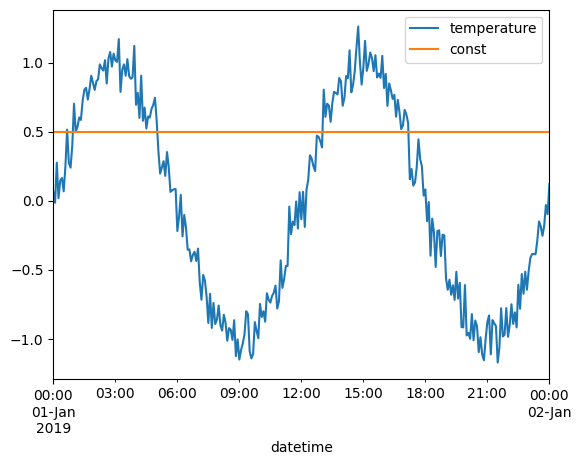

In [4]:
d.data.plot(x="datetime", y=["temperature",'const'])

If you want to change granularity, simply set the desired granularity and generate the data

<Axes: xlabel='datetime'>

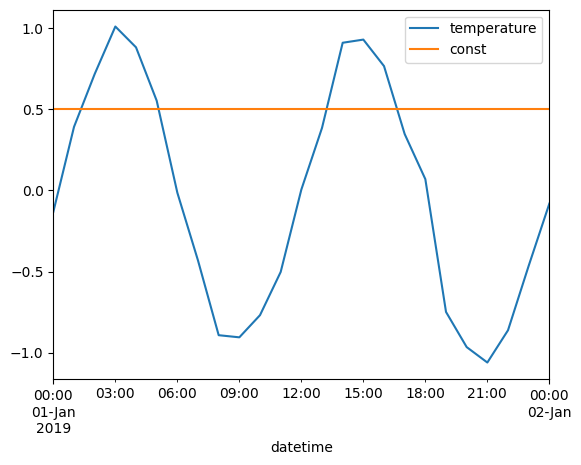

In [5]:
d.granularity = Granularity.HOURLY
d.generate_data()
d.data.plot(x="datetime", y=["temperature",'const'])

In [6]:
d.add_dimension("product1", function=lambda x: x*2)

In [9]:
d.metrics['temperature']

{'name': 'temperature', 'function_type': 'sine', 'function_value': None, 'frequency_in_hour': 12, 'offset_in_minutes': 0, 'scale': 1}